- This is the compilation of ERs. 

- In this script, we are going to plot ERs of simulation output and observation at model resolution.

- We also added ERs of emission flux and literature in the figure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Preparing required data

In [2]:
VOC_names = ['Ethane', 'Propane', 'Lumped ≥ C4 alkanes', 
             'Lumped ≥ C3 alkenes', 
             'Formaldehyde', 'Acetaldehyde', 'Lumped aldehydes',
             'Benzene', 'Toluene', 'Xylenes', 
             'Acetone', 'Methyl Ethyl Ketone', 
             'Formic acid', 'Acetic acid']

#### ERs - Fire locations

##### Grided ERs

In [3]:
# observation
grided_ERs_obs = [np.nan, 2.69, np.nan, 
                  np.nan,
                  14.37, 9.03, 0.69, 
                  1.78, 1.10, 0.18, 
                  4.88, 0.81, 
                  10.17, 11.64*0.75]
grided_ERs_obs_CI_low = [np.nan, -1.76, np.nan,
                         np.nan, 
                         12.88, 8.57, 0.38,
                         1.58, 0.97, 0.11,
                         4.1, 0.62, 
                         7.79, 9.93*0.75]
grided_ERs_obs_CI_high = [np.nan, 3.12, np.nan, 
                          np.nan, 
                          18.62, 9.45, 0.90, 
                          1.85, 1.31, 0.23, 
                          5.85, 0.87,
                          11.97, 13.83]
grided_ERs_obs_CI_lerror = list(np.array(grided_ERs_obs) - np.array(grided_ERs_obs_CI_low))  
grided_ERs_obs_CI_herror = list(np.array(grided_ERs_obs_CI_high) -np.array(grided_ERs_obs) )  
# GFED4
grided_ERs_gfed4 = [np.nan, 1, np.nan,
                    np.nan, 
                    9.32, 3.46, np.nan,
                    0.78, 0.20, 0.05,
                    8.20, 2.44, 
                    np.nan, np.nan]
grided_ERs_gfed4_CI_low = [np.nan, 0.80, np.nan,
                           np.nan,
                           5.73, 2.12, np.nan, 
                           0.69, 0.14, -0.05,
                           6.03, 1.92,
                           np.nan, np.nan]
grided_ERs_gfed4_CI_high = [np.nan, 1.16, np.nan,
                            np.nan, 
                            14.8, 5.47, np.nan, 
                            0.85, 0.27, 0.10, 
                            12.15, 3.42, 
                            np.nan, np.nan]
grided_ERs_gfed4_CI_lerror = list(np.array(grided_ERs_gfed4) - np.array(grided_ERs_gfed4_CI_low))  
grided_ERs_gfed4_CI_herror = list(np.array(grided_ERs_gfed4_CI_high) -np.array(grided_ERs_gfed4) )  
# GFAS

grided_ERs_gfas = [np.nan, 1.2, np.nan,
                   np.nan, 
                   11.58, 8.22, 0.45, 
                   1.66, 0.76, 0.038, 
                   6.31, 1.42, 
                   9.39, 7.69]
grided_ERs_gfas_CI_low = [np.nan, 1, np.nan,
                          np.nan, 
                          9.50, 7.13, 0.28, 
                          1.58, 0.63, 0.022, 
                          5.90, 1.37, 
                          9.27, 7.46]
grided_ERs_gfas_CI_high = [np.nan, 1.76, np.nan,
                           np.nan, 
                           15.01, 9.01, 0.59,
                           1.77, 0.91, 0.056, 
                           6.76, 1.51, 
                           9.53, 7.88]
grided_ERs_gfas_CI_lerror = list(np.array(grided_ERs_gfas) - np.array(grided_ERs_gfas_CI_low))  
grided_ERs_gfas_CI_herror = list(np.array(grided_ERs_gfas_CI_high) -np.array(grided_ERs_gfas) )  

# QFED
grided_ERs_qfed = [np.nan, 1.32, np.nan,
                   np.nan, 
                   12.64, 3.19, np.nan,
                   np.nan, np.nan, np.nan,
                   3.16, 1.61, 
                   np.nan, np.nan]
grided_ERs_qfed_CI_low = [np.nan, 1.17, np.nan, 
                          np.nan, 
                          10.12, 3.06, np.nan,
                          np.nan, np.nan, np.nan, 
                          2.79, 1.53,
                          np.nan, np.nan]
grided_ERs_qfed_CI_high = [np.nan, 1.37, np.nan,
                           np.nan, 
                           13.47, 3.44, np.nan,
                           np.nan, np.nan, np.nan,
                           3.88, 1.67, 
                           np.nan, np.nan]
grided_ERs_qfed_CI_lerror = list(np.array(grided_ERs_qfed) - np.array(grided_ERs_qfed_CI_low))  
grided_ERs_qfed_CI_herror = list(np.array(grided_ERs_qfed_CI_high) -np.array(grided_ERs_qfed) ) 

# compiling data
data_grided = {'Observation': grided_ERs_obs,
                'GFED4s'    : grided_ERs_gfed4,
                'GFASv1.2'  : grided_ERs_gfas,
                'QFED2.4'   : grided_ERs_qfed}

data_grided_low = {'Observation': grided_ERs_obs_CI_lerror,
                   'GFED4s'    : grided_ERs_gfed4_CI_lerror,
                   'GFASv1.2'  : grided_ERs_gfas_CI_lerror,
                   'QFED2.4'   : grided_ERs_qfed_CI_lerror}


data_grided_high = {'Observation': grided_ERs_obs_CI_herror,
                    'GFED4s'    : grided_ERs_gfed4_CI_herror,
                    'GFASv1.2'  : grided_ERs_gfas_CI_herror,
                    'QFED2.4'   : grided_ERs_qfed_CI_herror}

# Compiling grided ERs data
df_grided      = pd.DataFrame(data_grided, index = VOC_names)
df_grided_low  = pd.DataFrame(data_grided_low, index = VOC_names)
df_grided_high = pd.DataFrame(data_grided_high, index = VOC_names)

##### Raw ERs

In [4]:
# observation
raw_ERs_obs = [10.29, 2.74, 1.02,
               7.56, 
               18.22, 10.55, 1,
               1.76, 1.2, 0.222,
               4.06, 0.82,
               9.51, 11.48*0.75]

raw_ERs_obs_std = [6.68, 0.92, 0.63,
                   3.76,
                   3.26, 1.64, 0.31,
                   0.24, 0.33, 0.082,
                   0.06, 0.18,
                   4.2, 2.07*0.75]
'''
# remove wades' marker
raw_ERs_obs = [np.nan] * len(raw_ERs_obs)
raw_ERs_obs_std = [np.nan] * len(raw_ERs_obs)
'''

raw_ERs_obs_high = list(np.array(raw_ERs_obs) + np.array(raw_ERs_obs_std))
raw_ERs_obs_low =  list(np.array(raw_ERs_obs) - np.array(raw_ERs_obs_std))
raw_ERs_obs_lerror = list(np.array(raw_ERs_obs) - np.array(raw_ERs_obs_low))  
raw_ERs_obs_herror = list(np.array(raw_ERs_obs_high) -np.array(raw_ERs_obs) ) 

# GFED4
'''
raw_ERs_gfed4 = [6.9, 1.44, 1.31, 
                 7.83,
                 19.61, 5.36, np.nan,
                 1.04, 0.59, 0.33,
                 2.59, 0.7,
                 np.nan, np.nan]
'''
raw_ERs_gfed4 = [6.57, 1.49, 1.41, 
                 7.55,
                 20.29, 5.34, np.nan,
                 1.05, 0.61, 0.35,
                 2.69, 0.61,
                 np.nan, np.nan]
raw_ERs_gfed4_low = [6.15, 1.10, 0.68, 
                 7.50,
                 11.43, 5.30, np.nan,
                 1.05, 0.39, 0.09,
                 1.29, 0.55,
                 np.nan, np.nan]
raw_ERs_gfed4_high = [7.92, 1.99, 1.42, 
                 9.10,
                 21.11, 5.48, np.nan,
                 1.06, 0.62, 0.37,
                 2.82, 1.06,
                 np.nan, np.nan]
raw_ERs_gfed4_lerror = list(np.array(raw_ERs_gfed4) - np.array(raw_ERs_gfed4_low))  
raw_ERs_gfed4_herror = list(np.array(raw_ERs_gfed4_high) -np.array(raw_ERs_gfed4) ) 

# GFAS
'''
raw_ERs_gfas = [7.07, 1.6, 1.43,
                8.03,
                15.43, 10.14, 1.0, 
                1.86, 1.13, 0.11,
                4.95, 0.82,
                9.51, 11.48*0.75]
'''
raw_ERs_gfas = [7.92, 1.98, 1.58, 
                7.75,
                19.05, 10.82, np.nan, 
                1.95, 1.27, 0.13,
                4.96, np.nan,
                np.nan, np.nan]
raw_ERs_gfas_low = [6.15, 1.10, 1.26, 
                7.71,
                10.76, 9.43, np.nan, 
                1.76, 0.96, 0.07,
                4.96, np.nan,
                np.nan, np.nan]
raw_ERs_gfas_high = [7.92, 1.99, 1.58, 
                8.32,
                19.05, 10.82, np.nan, 
                1.96, 1.27, 0.13,
                6.10, np.nan,
                np.nan, np.nan]
raw_ERs_gfas_lerror = list(np.array(raw_ERs_gfas) - np.array(raw_ERs_gfas_low))  
raw_ERs_gfas_herror = list(np.array(raw_ERs_gfas_high) -np.array(raw_ERs_gfas) ) 

# QFED
'''
raw_ERs_qfed = [4.87, 1.33, 0.39,
                3.34, 
                16.44, 3.21, np.nan,  
                np.nan, np.nan, np.nan, 
                2.48, 1.55,
                np.nan, np.nan]
'''

raw_ERs_qfed = [4.97, 1.41, 0.42,
                3.49, 
                18.28, 2.83, np.nan,  
                np.nan, np.nan, np.nan, 
                2.40, 1.56,
                np.nan, np.nan]

raw_ERs_qfed_low = [4.96, 1.40, 0.41,
                3.48, 
                17.98, 2.83, np.nan,  
                np.nan, np.nan, np.nan, 
                2.40, 1.56,
                np.nan, np.nan]

raw_ERs_qfed_high = [4.97, 1.41, 0.42,
                3.49, 
                18.28, 2.87, np.nan,  
                np.nan, np.nan, np.nan, 
                2.42, 1.56,
                np.nan, np.nan]
raw_ERs_qfed_lerror = list(np.array(raw_ERs_qfed) - np.array(raw_ERs_qfed_low))  
raw_ERs_qfed_herror = list(np.array(raw_ERs_qfed_high) -np.array(raw_ERs_qfed) ) 

# Compiling raw ERs data
data_raw = {'Observation': raw_ERs_obs,
            'GFED4s'    : raw_ERs_gfed4,
            'GFASv1.2'  : raw_ERs_gfas,
            'QFED2.4'   : raw_ERs_qfed}

data_raw_low = {'Observation': raw_ERs_obs_lerror,
                'GFED4s'    : raw_ERs_gfed4_lerror,
                'GFASv1.2'  : raw_ERs_gfas_lerror,
                'QFED2.4'   : raw_ERs_qfed_lerror}

data_raw_high = {'Observation': raw_ERs_obs_herror,
                 'GFED4s'    : raw_ERs_gfed4_herror,
                 'GFASv1.2'  : raw_ERs_gfas_herror,
                 'QFED2.4'   : raw_ERs_qfed_herror}

df_raw = pd.DataFrame(data_raw, 
                      index = VOC_names)

df_raw_low = pd.DataFrame(data_raw_low, 
                       index = VOC_names)

df_raw_high = pd.DataFrame(data_raw_high, 
                       index = VOC_names)

##### added ERs in GC

In [5]:
added_ERs_obs =[np.nan]*len(raw_ERs_obs)
added_ERs_obs_high = [np.nan]*len(raw_ERs_obs)
added_ERs_obs_lerror =  [np.nan]*len(raw_ERs_obs)
added_ERs_obs_herror =  [np.nan]*len(raw_ERs_obs)

added_ERs_gfed4 = [np.nan]*len(raw_ERs_gfed4)
added_ERs_gfed4_lerror = [np.nan]*len(raw_ERs_gfed4)
added_ERs_gfed4_herror = [np.nan]*len(raw_ERs_gfed4)

added_ERs_gfas = [np.nan, np.nan, np.nan, 
                np.nan,
                np.nan, np.nan, 1, 
                np.nan, np.nan, np.nan,
                np.nan, 0.82,
               9.51, 11.48*0.75]
added_ERs_gfas_lerror = [np.nan]*len(raw_ERs_gfas)
added_ERs_gfas_herror = [np.nan]*len(raw_ERs_gfas)

added_ERs_qfed = [np.nan]*len(raw_ERs_qfed)
added_ERs_qfed_lerror = [np.nan]*len(raw_ERs_qfed)
added_ERs_qfed_herror = [np.nan]*len(raw_ERs_qfed)

# Compiling added ERs data
data_added = {'Observation': added_ERs_obs,
            'GFED4s'    : added_ERs_gfed4,
            'GFASv1.2'  : added_ERs_gfas,
            'QFED2.4'   : added_ERs_qfed}

data_added_low = {'Observation': added_ERs_obs_lerror,
                'GFED4s'    : added_ERs_gfed4_lerror,
                'GFASv1.2'  : added_ERs_gfas_lerror,
                'QFED2.4'   : added_ERs_qfed_lerror}

data_added_high = {'Observation': added_ERs_obs_herror,
                 'GFED4s'    : added_ERs_gfed4_herror,
                 'GFASv1.2'  : added_ERs_gfas_herror,
                 'QFED2.4'   : added_ERs_qfed_herror}

df_added = pd.DataFrame(data_added, 
                      index = VOC_names)

df_added_low = pd.DataFrame(data_added_low, 
                       index = VOC_names)

df_added_high = pd.DataFrame(data_added_high, 
                       index = VOC_names)


##### Plotting part

In [6]:
# plot setting
barWidth = 0.6
ls = 'dotted'
# subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 12),sharex=True)

for rows, ax in zip(df_grided.index, axes.flatten()):
    bars =['Observation', 'GFED4s', 'GFASv1.2', 'QFED2.4']
    y_pos  = np.arange(len(bars))
    
    # plot barplot based on grided ERs
    ax.bar(y_pos, df_grided.loc[rows].astype(float), 
           width = barWidth, 
           color = ['black','tab:red','tab:blue','tab:orange'], edgecolor = 'black', 
           capsize=7, 
           label=rows, 
           yerr = [df_grided_low.loc[rows].astype(float), df_grided_high.loc[rows].astype(float)]
          ) 
        
    ax.errorbar(y_pos+0.25, df_raw.loc[rows].astype(float),
                fmt=' ', marker = 'v', 
                color='black', 
                capsize=5, 
                yerr = [df_raw_low.loc[rows].astype(float), df_raw_high.loc[rows].astype(float)] 
               )
               
    
    ax.errorbar(y_pos+0.25, df_added.loc[rows].astype(float),
                fmt=' ', marker='o', 
                color='r', 
                capsize=5, 
                yerr = [df_added_low.loc[rows].astype(float), df_added_high.loc[rows].astype(float)] 
               )
               
    
    # Spacing Out
    plt.subplots_adjust(wspace=.15, hspace=.12)
    
    ## general layout
    ax.set_xticks(np.arange(len(bars)))
    ax.set_xticklabels(bars, rotation=45) #rotation=45
    
    ax.set_title(rows,fontsize=15)
    
    ax.tick_params(axis='both', labelsize=15)


# clean up the remainder
#fig.delaxes(axes[4, 2])
#fig.delaxes(axes[4, 3])
#fig.delaxes(axes[4, 4])
#fig.delaxes(axes[4, 5])
fig.delaxes(axes[3, 2])
fig.delaxes(axes[3, 3])

# add texts
fig=axes[0,0].figure
#fig.text(0.5,0.91, "VOCs emission ratios in WE-CAN campaign", ha="center", va="center",fontsize=20)
#fig.text(0.08,0.5, "Emission ratios (ppb/ppm)", ha="center", va="center", rotation=90,fontsize = 15)

plt.tight_layout() # 1) change it into ptyhon script to save the figure out later; 2) run it in griz cluster
fig.savefig('./figure/ERs_compilation_all.png')
plt.close() #where f is the figure

In [7]:
'''
main-text plots
1) remove MEK in GFAS
2) remove RCHO, acetic acid and formic acid
3) remove ethane, ALK4 and PRPE
4) make wades' observatrion (raw_observation) as missing.
'''
# Data processing
## removing
df_grided_main = df_grided.drop(labels= ['Lumped aldehydes', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
                                         'Ethane', 'Formic acid', 'Acetic acid'], axis=0, inplace=False)
df_grided_main['GFASv1.2']['Methyl Ethyl Ketone'] = np.nan
df_grided_high_main = df_grided_high.drop(labels= ['Lumped aldehydes', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
                                         'Ethane', 'Formic acid', 'Acetic acid'], axis=0, inplace=False)
df_grided_low_main = df_grided_low.drop(labels= ['Lumped aldehydes', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
                                         'Ethane', 'Formic acid', 'Acetic acid'], axis=0, inplace=False)
df_raw_main = df_raw.drop(labels= ['Lumped aldehydes', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
                                         'Ethane', 'Formic acid', 'Acetic acid'], axis=0, inplace=False)
df_raw_low_main = df_raw_low.drop(labels= ['Lumped aldehydes', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
                                         'Ethane', 'Formic acid', 'Acetic acid'], axis=0, inplace=False)
df_raw_high_main = df_raw_high.drop(labels= ['Lumped aldehydes', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
                                         'Ethane', 'Formic acid', 'Acetic acid'], axis=0, inplace=False)
df_added_main = df_added.drop(labels= ['Lumped aldehydes', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
                                         'Ethane', 'Formic acid', 'Acetic acid'], axis=0, inplace=False)

## adding dummy data and reset the order to meet the scatterplot
df_grided_main.loc['dummy'] = [np.nan, np.nan, np.nan, np.nan]
df_grided_main = df_grided_main.reindex(['Formaldehyde','Acetaldehyde','Acetone',
                                        'Propane','Methyl Ethyl Ketone','dummy',
                                        'Benzene','Toluene','Xylenes'])
df_grided_low_main.loc['dummy'] = [np.nan, np.nan, np.nan, np.nan]
df_grided_low_main = df_grided_low_main.reindex(['Formaldehyde','Acetaldehyde','Acetone',
                                        'Propane','Methyl Ethyl Ketone','dummy',
                                        'Benzene','Toluene','Xylenes'])
df_grided_high_main.loc['dummy'] = [np.nan, np.nan, np.nan, np.nan]
df_grided_high_main = df_grided_high_main.reindex(['Formaldehyde','Acetaldehyde','Acetone',
                                        'Propane','Methyl Ethyl Ketone','dummy',
                                        'Benzene','Toluene','Xylenes'])
df_raw_main.loc['dummy'] = [np.nan, np.nan, np.nan, np.nan]
df_raw_main = df_raw_main.reindex(['Formaldehyde','Acetaldehyde','Acetone',
                                        'Propane','Methyl Ethyl Ketone','dummy',
                                        'Benzene','Toluene','Xylenes'])
df_raw_low_main.loc['dummy'] = [np.nan, np.nan, np.nan, np.nan]
df_raw_low_main = df_raw_low_main.reindex(['Formaldehyde','Acetaldehyde','Acetone',
                                        'Propane','Methyl Ethyl Ketone','dummy',
                                        'Benzene','Toluene','Xylenes'])
df_raw_high_main.loc['dummy'] = [np.nan, np.nan, np.nan, np.nan]
df_raw_high_main = df_raw_high_main.reindex(['Formaldehyde','Acetaldehyde','Acetone',
                                        'Propane','Methyl Ethyl Ketone','dummy',
                                        'Benzene','Toluene','Xylenes'])
## removing Wade's observation
df_raw_main['Observation'] = np.nan
df_raw_low_main['Observation'] = np.nan
df_raw_high_main['Observation'] = np.nan

## Plotting part
### plot setting
#### bar
barWidth = 0.6
linewidth = 3
alpha = 0.65
#### error bar
capsize = 7
capthick=2.5
err_lw = 2.5
#### char
fontsize = 15

### subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12),sharex=True)

for rows, ax in zip(df_grided_main.index, axes.flatten()):
    bars =['Observation', 'GFED4s', 'GFASv1.2', 'QFED2.4']
    y_pos  = np.arange(len(bars))
    
    # plot barplot based on grided ERs
    ax.bar(y_pos, df_grided_main.loc[rows].astype(float), 
           width = barWidth,  linewidth = 2, alpha= alpha,
           color = ['black','tab:red','tab:blue','tab:orange'], edgecolor = 'black', 
           error_kw=dict(lw=err_lw, capsize=capsize, capthick=capthick),
           label=rows,
           yerr = [df_grided_low_main.loc[rows].astype(float), df_grided_high_main.loc[rows].astype(float)] 
          )

    
    ax.errorbar(y_pos+0.25, df_raw_main.loc[rows].astype(float),
                fmt=' ', marker='o', 
                color='black', 
                capsize=capsize, capthick=capthick,elinewidth=err_lw, markersize = capsize,
                yerr = [df_raw_low_main.loc[rows].astype(float), df_raw_high_main.loc[rows].astype(float)] 
                )

    # Spacing Out
    plt.subplots_adjust(wspace=.15, hspace=.12)
    
    ## general layout
    ax.set_xticks(np.arange(len(bars)))
    ax.set_xticklabels(bars, rotation=45) #rotation=45
    
    ax.set_title(rows,fontsize=fontsize)
    
    ax.tick_params(axis='both', labelsize=fontsize)

# clean up the remainder
fig.delaxes(axes[1, 2])
    
### add texts
fig=axes[0,0].figure
#fig.text(0.5,0.91, "VOCs emission ratios in WE-CAN campaign", ha="center", va="center",fontsize=20)
#fig.text(0.08,0.5, "Emission ratios (ppb/ppm)", ha="center", va="center", rotation=90,fontsize = 15)

plt.tight_layout() # 1) change it into ptyhon script to save the figure out later; 2) run it in griz cluster
fig.savefig('./figure/ERs_raw_grided_main.png')
plt.close() #where f is the figure


In [8]:
'''
SI version plots
'''
# first plot: 1s observed ERs and emission flux modeled ERs
df_raw_SI1 = df_raw.loc[['Ethane','Lumped ≥ C4 alkanes','Lumped ≥ C3 alkenes']]
df_raw_low_SI = df_raw_low.loc[['Ethane','Lumped ≥ C4 alkanes','Lumped ≥ C3 alkenes']]
df_raw_high_SI = df_raw_high.loc[['Ethane','Lumped ≥ C4 alkanes','Lumped ≥ C3 alkenes']]

barWidth = 0.6
linewidth = 3
alpha = 0.65
capsize = 7
capthick=2.5
err_lw = 2.5
fontsize = 15

fig, axes = plt.subplots(1, 3, figsize=(15, 5),sharex=True)

for rows, ax in zip(df_raw_SI1.index, axes.flatten()):
    bars =['Observation', 'GFED4s', 'GFASv1.2', 'QFED2.4']
    y_pos  = np.arange(len(bars))
    
    ax.errorbar(y_pos, df_raw_SI1.loc[rows].astype(float),
                fmt=' ', marker='o', 
                color='black', 
                capsize=capsize, capthick=capthick,elinewidth=err_lw, markersize = capsize,
                yerr = [df_raw_low_SI.loc[rows].astype(float), df_raw_high_SI.loc[rows].astype(float)] 
                )
    
    # Spacing Out
    plt.subplots_adjust(wspace=.15, hspace=.12)
    
    ## general layout
    ax.set_xticks(np.arange(len(bars)))
    ax.set_xticklabels(bars, rotation=30) #rotation=45
    
    ax.set_title(rows,fontsize=fontsize)
    
    ax.tick_params(axis='both', labelsize=fontsize)
    
    
# clean up the remainder
#fig.delaxes(axes[-1, -1])
    
### add texts
#fig=axes[0,0].figure
#fig.text(0.5,0.91, "VOCs emission ratios in WE-CAN campaign", ha="center", va="center",fontsize=20)
#fig.text(0.08,0.5, "Emission ratios (ppb/ppm)", ha="center", va="center", rotation=90,fontsize = 15)

plt.tight_layout() # 1) change it into ptyhon script to save the figure out later; 2) run it in griz cluster
fig.savefig('./figure/ERs_raw_SI1.png')
plt.close() #where f is the figure

In [9]:
# second plot: grided observation vs grided simulation( 1s ERs implemented)
df_grided_SI2      = df_grided.loc[['Methyl Ethyl Ketone','Formic acid','Acetic acid']][['Observation', 'GFASv1.2']]
df_grided_low_SI2  = df_grided_low.loc[['Methyl Ethyl Ketone','Formic acid','Acetic acid']][['Observation', 'GFASv1.2']]
df_grided_high_SI2 = df_grided_high.loc[['Methyl Ethyl Ketone','Formic acid','Acetic acid']][['Observation', 'GFASv1.2']]
df_added_SI2       = df_added.loc[['Methyl Ethyl Ketone','Formic acid','Acetic acid']][['Observation', 'GFASv1.2']]
df_added_low_SI2   = df_added_low.loc[['Methyl Ethyl Ketone','Formic acid','Acetic acid']][['Observation', 'GFASv1.2']]
df_added_high_SI2  = df_added_high.loc[['Methyl Ethyl Ketone','Formic acid','Acetic acid']][['Observation', 'GFASv1.2']]


barWidth = 0.6
linewidth = 3
alpha = 0.65
capsize = 7
capthick=2.5
err_lw = 2.5
fontsize = 15

fig, axes = plt.subplots(1, 3, figsize=(15, 5),sharex=True)

for rows, ax in zip(df_grided_SI2.index, axes.flatten()):
    bars =['Observation', 'GFASv1.2']
    y_pos  = np.arange(len(bars))
    
    
    # plot barplot based on grided ERs
    ax.bar(y_pos, df_grided_SI2.loc[rows].astype(float), 
           width = barWidth,  linewidth = 2, alpha= alpha,
           color = ['black','tab:blue'], edgecolor = 'black', 
           error_kw=dict(lw=err_lw, capsize=capsize, capthick=capthick),
           label=rows,
           yerr = [df_grided_low_SI2.loc[rows].astype(float), df_grided_high_SI2.loc[rows].astype(float)] 
          )
    
    ax.errorbar(y_pos+0.25, df_added_SI2.loc[rows].astype(float),
                fmt=' ', marker='o', 
                color='black', 
                capsize=5, markersize = 8,
                yerr = [df_added_low_SI2.loc[rows].astype(float), df_added_high_SI2.loc[rows].astype(float)] 
               )
    
    # Spacing Out
    plt.subplots_adjust(wspace=.15, hspace=.12)
    
    ## general layout
    ax.set_xticks(np.arange(len(bars)))
    ax.set_xticklabels(bars, rotation=30) #rotation=45
    
    ax.set_title(rows,fontsize=fontsize)
    
    ax.tick_params(axis='both', labelsize=fontsize)
    
    
# clean up the remainder
#fig.delaxes(axes[-1, -1])
    
### add texts
#fig=axes[0,0].figure
#fig.text(0.5,0.91, "VOCs emission ratios in WE-CAN campaign", ha="center", va="center",fontsize=20)
#fig.text(0.08,0.5, "Emission ratios (ppb/ppm)", ha="center", va="center", rotation=90,fontsize = 15)

plt.tight_layout() # 1) change it into ptyhon script to save the figure out later; 2) run it in griz cluster
fig.savefig('./figure/ERs_implemented_simu_SI2.png')
plt.close() #where f is the figure

##### some preliminary analysis 

In [10]:
# compare 1min observed ERs and 1s observed ERs
(np.array(grided_ERs_obs) - np.array(raw_ERs_obs))/np.array(raw_ERs_obs)*100

array([         nan,  -1.82481752,          nan,          nan,
       -21.13062569, -14.40758294, -31.        ,   1.13636364,
        -8.33333333, -18.91891892,  20.19704433,  -1.2195122 ,
         6.94006309,   1.39372822])

We initially confirm that the grided observed ERs agree with raw observed ERs in Permar et al. (2021) within 20% uncertainty.

,GFED4s,GFASv1.2,QFED2.4
Ethane,NaN,NaN,NaN
Propane,-32.885906,-39.393939,-6.382979
Lumped ≥ C4 alkanes,NaN,NaN,NaN
Lumped ≥ C3 alkenes,NaN,NaN,NaN
Formaldehyde,-54.066042,-39.212598,-30.853392
Acetaldehyde,-35.205993,-24.029575,12.720848
Lumped aldehydes,NaN,NaN,NaN
Benzene,-25.714286,-14.871795,NaN
Toluene,-67.213115,-40.157480,NaN
Xylenes,-85.714286,-70.769231,NaN


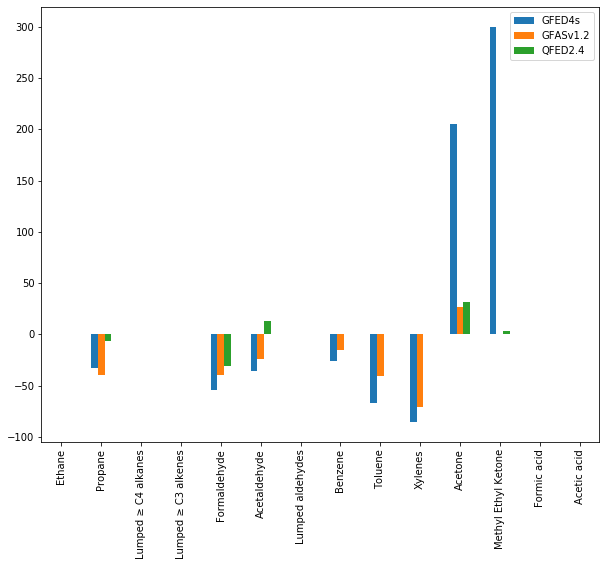

In [11]:
# # compare fullchem modeled ERs and emission flux ERs
comp_raw_grided_gfed4 = (np.array(grided_ERs_gfed4) - np.array(raw_ERs_gfed4))/np.array(raw_ERs_gfed4)*100
comp_raw_grided_gfas = (np.array(grided_ERs_gfas) - np.array(raw_ERs_gfas))/np.array(raw_ERs_gfas)*100
comp_raw_grided_qfed = (np.array(grided_ERs_qfed) - np.array(raw_ERs_qfed))/np.array(raw_ERs_qfed)*100


comp_raw_grided_data = {'GFED4s'    : comp_raw_grided_gfed4,
                        'GFASv1.2'  : comp_raw_grided_gfas,
                        'QFED2.4'   : comp_raw_grided_qfed}

df_comp_raw_grided = pd.DataFrame(comp_raw_grided_data, 
                        index = VOC_names)

df_comp_raw_grided.plot.bar(figsize = (10,8))

df_comp_raw_grided

Uncertainty of GFAS and QFED (within 40%) is okay but GFED4 is not stable(could reach a factor of 2-3). 

,GFED4s,GFASv1.2,QFED2.4
Ethane,-36.151603,-23.032070,-51.700680
Propane,-45.620438,-27.737226,-48.540146
Lumped ≥ C4 alkanes,38.235294,54.901961,-58.823529
Lumped ≥ C3 alkenes,-0.132275,2.513228,-53.835979
Formaldehyde,11.361142,4.555434,0.329308
Acetaldehyde,-49.383886,2.559242,-73.175355
Lumped aldehydes,NaN,NaN,NaN
Benzene,-40.340909,10.795455,NaN
Toluene,-49.166667,5.833333,NaN
Xylenes,57.657658,-41.441441,NaN


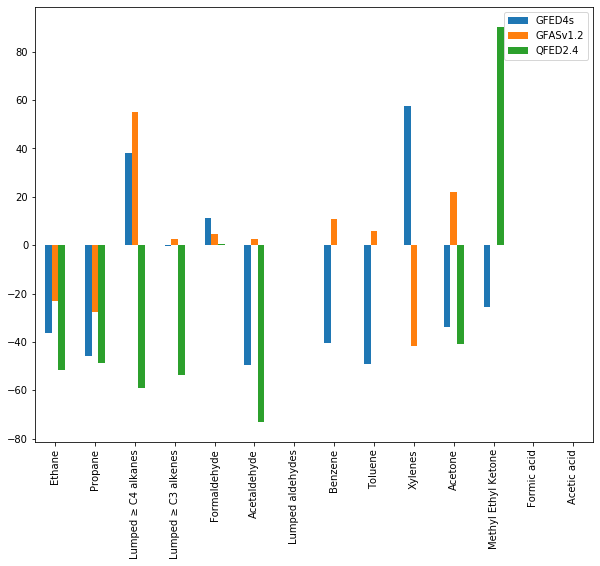

In [12]:
# compare raw observed ERs (1s) and raw modeled ERs (fluxes)
comp_raw_obs_gfed4 = -(np.array(raw_ERs_obs) - np.array(raw_ERs_gfed4))/np.array(raw_ERs_obs)*100
comp_raw_obs_gfas = -(np.array(raw_ERs_obs) - np.array(raw_ERs_gfas))/np.array(raw_ERs_obs)*100
comp_raw_obs_qfed = -(np.array(raw_ERs_obs) - np.array(raw_ERs_qfed))/np.array(raw_ERs_obs)*100


comp_raw_obs_mod_data = {'GFED4s'    : comp_raw_obs_gfed4,
                        'GFASv1.2'  : comp_raw_obs_gfas,
                        'QFED2.4'   : comp_raw_obs_qfed}

df_comp_raw_obs_mod_data = pd.DataFrame(comp_raw_obs_mod_data, 
                            index = VOC_names)

df_comp_raw_obs_mod_data.plot.bar(figsize = (10,8))

df_comp_raw_obs_mod_data

GFAS tends to be the best. 

,GFED4s,GFASv1.2,QFED2.4
Ethane,NaN,NaN,NaN
Propane,-62.825279,-55.390335,-50.929368
Lumped ≥ C4 alkanes,NaN,NaN,NaN
Lumped ≥ C3 alkenes,NaN,NaN,NaN
Formaldehyde,-35.142658,-19.415449,-12.038970
Acetaldehyde,-61.683278,-8.970100,-64.673311
Lumped aldehydes,NaN,-34.782609,NaN
Benzene,-56.179775,-6.741573,NaN
Toluene,-81.818182,-30.909091,NaN
Xylenes,-72.222222,-78.888889,NaN


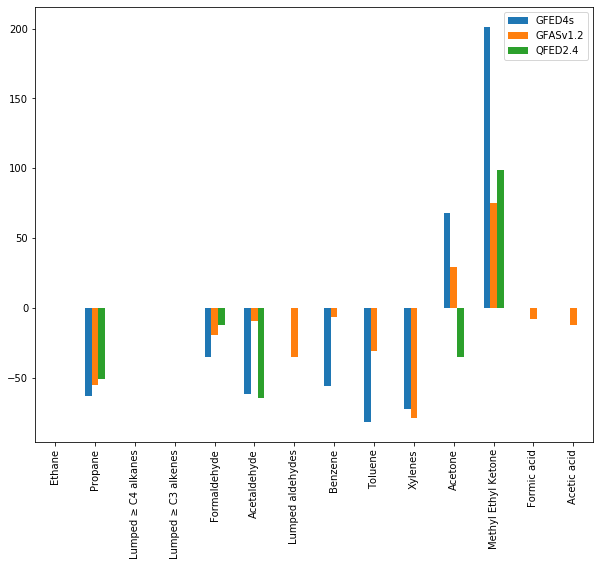

In [13]:
# compare grided observed ERs (1min) and grided modeled ERs (full chemistry)
comp_grided_obs_gfed4 = -(np.array(grided_ERs_obs) - np.array(grided_ERs_gfed4))/np.array(grided_ERs_obs)*100
comp_grided_obs_gfas = -(np.array(grided_ERs_obs) - np.array(grided_ERs_gfas))/np.array(grided_ERs_obs)*100
comp_grided_obs_qfed = -(np.array(grided_ERs_obs) - np.array(grided_ERs_qfed))/np.array(grided_ERs_obs)*100


comp_grided_obs_mod_data = {'GFED4s'    : comp_grided_obs_gfed4,
                        'GFASv1.2'  : comp_grided_obs_gfas,
                        'QFED2.4'   : comp_grided_obs_qfed}

df_comp_grided_obs_mod_data = pd.DataFrame(comp_grided_obs_mod_data, 
                            index = VOC_names)

df_comp_grided_obs_mod_data.plot.bar(figsize = (10,8))

df_comp_grided_obs_mod_data

Overall is okay. GFAS tends to be the best.

#### Emissions and ERs - Western US

In [14]:
# Emissions
Emis_gfed4_wus = [36.34, 9.98, 11.25, 
                  59.95,
                  43.14, 26.90,
                  np.nan, 
                  15.28, 9.29, 5.24, 
                  16.63, 8.31, 
                  np.nan, np.nan]

Emis_gfas_wus = [23.88, 7.78, 9.63, 
                  40.76,
                  25.13, 34.66,
                  np.nan, 
                  18.82, 13.16, 1.39, 
                  28.27, np.nan, 
                  np.nan, np.nan]


Emis_qfed_wus = [23.71, 9.10, 3.41, 
                  23.67,
                  33.26, 17.07,
                  np.nan, 
                  np.nan, np.nan, np.nan, 
                  19.48, 15.21, 
                  np.nan, np.nan]

df_ERs = pd.read_csv("/glade/u/home/lixujin/IDL/flight_inventories/emissions_processing/GC13.3.2/test_ERs.csv")
df_ERs.columns = ['Name', 'GFED4', 'GFAS', 'QFED']
RCHO_row = {'Name':'RCHO', 'GFED4':np.nan, 'GFAS':np.nan, 'QFED':np.nan}
HCOOH_row = {'Name':'Formic acid', 'GFED4':np.nan, 'GFAS':np.nan, 'QFED':np.nan}
CH3COOH_row = {'Name':'Acetic acid', 'GFED4':np.nan, 'GFAS':np.nan, 'QFED':np.nan}
df_ERs = df_ERs.append(RCHO_row, ignore_index=True)
df_ERs = df_ERs.append(HCOOH_row, ignore_index=True)
df_ERs = df_ERs.append(CH3COOH_row, ignore_index=True)
df_ERs.index = df_ERs['Name']
df_ERs = df_ERs.drop(['Name'], axis = 1)
df_ERs = df_ERs.reindex(["Ethane", "Propane", "ALK4", "PRPE", "Formaldehyde", 
                         'Acetaldehyde', 'RCHO','BENZ','TOLU','XYLE', 
                         'ACET','MEK','Formic acid', 'Acetic acid'])

df_ERs_std = pd.read_csv("/glade/u/home/lixujin/IDL/flight_inventories/emissions_processing/GC13.3.2/test_std.csv")
df_ERs_std.columns = ['Name', 'GFED4', 'GFAS', 'QFED']
RCHO_row = {'Name':'RCHO', 'GFED4':np.nan, 'GFAS':np.nan, 'QFED':np.nan}
HCOOH_row = {'Name':'Formic acid', 'GFED4':np.nan, 'GFAS':np.nan, 'QFED':np.nan}
CH3COOH_row = {'Name':'Acetic acid', 'GFED4':np.nan, 'GFAS':np.nan, 'QFED':np.nan}
df_ERs_std= df_ERs_std.append(RCHO_row, ignore_index=True)
df_ERs_std= df_ERs_std.append(HCOOH_row, ignore_index=True)
df_ERs_std= df_ERs_std.append(CH3COOH_row, ignore_index=True)
df_ERs_std.index = df_ERs_std['Name']
df_ERs_std= df_ERs_std.drop(['Name'], axis = 1)
df_ERs_std= df_ERs_std.reindex(["Ethane", "Propane", "ALK4", "PRPE", "Formaldehyde", 
                         'Acetaldehyde', 'RCHO','BENZ','TOLU','XYLE', 
                         'ACET','MEK','Formic acid', 'Acetic acid'])

ERs_gfed4_wus = df_ERs['GFED4'].values
ERs_gfas_wus = df_ERs['GFAS'].values
ERs_qfed_wus = df_ERs['QFED'].values

ERs_std_gfed4_wus = df_ERs_std['GFED4'].values
ERs_std_gfas_wus = df_ERs_std['GFAS'].values
ERs_std_qfed_wus = df_ERs_std['QFED'].values

# Dry matter
# unit of emis is GgC
# unit of ER is ppb/ppm
# unit of EF is g/kg DM, EF = ER*MWvoc/MWco*EFco, EFco is 99.3 g/kg
# 
EFco =  99.3

MWs = [30.08, 44.11, 58.12, 42.09, 
       30.03, 44.06, 58.09, 
       78.12, 92.15, 106.18, 
       58.09, 72.11, 
       46.03, 60.06]

EFs_gfed4_wus = np.array(ERs_gfed4_wus)*np.array(MWs)/28*EFco
EFs_gfas_wus = np.array(ERs_gfas_wus)*np.array(MWs)/28*EFco
EFs_qfed_wus = np.array(ERs_qfed_wus)*np.array(MWs)/28*EFco

# unit: kg
DM_gfed4_wus = np.array(Emis_gfed4_wus)*1e6/12*np.array(MWs)/EFs_gfed4_wus
DM_gfas_wus = np.array(Emis_gfas_wus)*1e6/12*np.array(MWs)/EFs_gfas_wus
DM_qfed_wus = np.array(Emis_qfed_wus)*1e6/12*np.array(MWs)/EFs_qfed_wus


In [15]:
DM_gfed4_wus

array([ 98375.56301606, 210451.5119099 , 366412.94768517, 156199.63216727,
        76590.89935155, 115069.84309568,             nan, 338209.56844133,
       502226.4370628 , 783494.85299739, 239761.88433917, 191891.49665045,
                   nan,             nan])

In [16]:
# emission data 
Emis_wus = {    'GFED4s'    : Emis_gfed4_wus,
                'GFASv1.2'  : Emis_gfas_wus,
                'QFED2.4'   : Emis_qfed_wus}

df_Emis_wus    = pd.DataFrame(Emis_wus, index = VOC_names)

# emission ratio data
ERs_wus = {    'GFED4s'    : ERs_gfed4_wus,
                'GFASv1.2'  : ERs_gfas_wus,
                'QFED2.4'   : ERs_qfed_wus}
ERs_wus_low = {    'GFED4s'    : ERs_gfed4_wus - ERs_std_gfed4_wus,
                'GFASv1.2'  : ERs_gfas_wus - ERs_std_gfas_wus,
                'QFED2.4'   : ERs_qfed_wus - ERs_std_qfed_wus}
ERs_wus_high = {    'GFED4s'    : ERs_gfed4_wus + ERs_std_gfed4_wus,
                    'GFASv1.2'  : ERs_gfas_wus + ERs_std_gfas_wus,
                    'QFED2.4'   : ERs_qfed_wus + ERs_std_qfed_wus}

ERs_wus_std = {    'GFED4s'    : ERs_std_gfed4_wus,
                    'GFASv1.2'  :  ERs_std_gfas_wus,
                    'QFED2.4'   : ERs_std_qfed_wus}

df_ERs_wus    = pd.DataFrame(ERs_wus, index = VOC_names)
df_ERs_wus_low    = pd.DataFrame(ERs_wus_low, index = VOC_names)
df_ERs_wus_high    = pd.DataFrame(ERs_wus_high, index = VOC_names)
df_ERs_wus_std = pd.DataFrame(ERs_wus_std, index = VOC_names)

# dry matter data
DM_wus = {      'GFED4s'    : DM_gfed4_wus,
                'GFASv1.2'  : DM_gfas_wus,
                'QFED2.4'   : DM_qfed_wus}

df_DM_wus    = pd.DataFrame(DM_wus, index = VOC_names)


In [17]:
df_Emis_wus.index

Index(['Ethane', 'Propane', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
       'Formaldehyde', 'Acetaldehyde', 'Lumped aldehydes', 'Benzene',
       'Toluene', 'Xylenes', 'Acetone', 'Methyl Ethyl Ketone', 'Formic acid',
       'Acetic acid'],
      dtype='object')

In [18]:
'''
Main-text version: only contain ALK4, PRPE, XYLE, and MEK
'''
# ===============
# data preprocess
# ===============
# Studied_VOCs = ['Propane','Xylenes']
Studied_VOCs = ['Formaldehyde', 'Acetaldehyde', 'Acetone', 
               'Propane', 'Methyl Ethyl Ketone', 'Ethane', 
               'Benzene', 'Toluene', 'Xylenes']

df_Emis_wus_main = df_Emis_wus.loc[Studied_VOCs]
df_ERs_wus_main = df_ERs_wus.loc[Studied_VOCs]
df_ERs_wus_low_main = df_ERs_wus_low.loc[Studied_VOCs]
df_ERs_wus_high_main = df_ERs_wus_high.loc[Studied_VOCs]
df_ERs_wus_std_main = df_ERs_wus_std.loc[Studied_VOCs]
# =============
# plot setting
# =============
barWidth, linewidth = 0.6, 0 # 
capsize, capthick = 7, 3
elinewidth = 4
#markersize = 10
fontsize = 18
lablesize = 18
# number of col and rows
row, col = 3, 3
# figure size 
fig_len, fig_wid = 16, 12 
ls = 'dotted'
# ========
# subplots
# ========
fig, axes = plt.subplots(row, col, figsize=(fig_len, fig_wid),sharex=True)
for rows, ax in zip(df_Emis_wus_main.index, axes.flatten()):
    bars =['GFED4', 'GFAS', 'QFED']
    y_pos  = np.arange(len(bars))*1.5
    
    # plot barplot based on grided ERs
    ax.bar(y_pos, df_Emis_wus_main.loc[rows].astype(float), 
           width = barWidth, 
           linewidth = linewidth,
           color = ['black'], edgecolor = 'black', 
           capsize=capsize, 
           label=rows)
    
    # Adding Twin Axes to plot using dataset_2
    ax_right = ax.twinx() 

    # plot errorbar based on raw ERs     
    '''
    ax_right.errorbar(y_pos+0.25, df_ERs_wus_main.loc[rows].astype(float),
                        fmt=' ', marker='o', 
                        color='red', 
                        capsize=capsize, capthick=capsize,elinewidth=elinewidth, markersize = markersize,
                        yerr = df_ERs_wus_std_main.loc[rows].astype(float) )
    '''                    
    ax_right.bar(y_pos+barWidth, df_ERs_wus_main.loc[rows].astype(float),
                        width = barWidth, 
                        linewidth = linewidth,                 
                        color='tab:red', ecolor='darkred',
                        #alpha=0.7, 
                        error_kw=dict(lw=elinewidth, capsize=capsize, capthick=capthick),
                        capsize=capsize,# capthick=capsize,elinewidth=elinewidth, markersize = markersize,
                        yerr = df_ERs_wus_std_main.loc[rows].astype(float) )
    
    
    
    # marker
    #ax_right.plot(y_pos, df_ERs_wus_main.loc[rows].astype(float),
    #              marker="o", linestyle="", alpha=0.8, 
    #              color="r")

    # Spacing Out
    plt.subplots_adjust(wspace=.15, hspace=.12)
    
    ## general layout
    ax.set_title(rows,fontsize=fontsize)

    ax.set_xticks( (y_pos + (y_pos+barWidth))/2)
    ax.set_xticklabels(bars)#, rotation=45) #rotation=45, fontweight='bold'
    
    ax.tick_params(axis='both', labelsize=lablesize)
    ax_right.tick_params(axis='y', labelsize=lablesize, labelcolor = 'tab:red')
    ax_right.set_ylim([0, None])

    
# add texts
#fig=axes[0].figure # [0, 0] or [0]
#fig.text(0.8, 0.9, "Emission estimates", ha="center", va="center",fontsize=20, color ='black')
#fig.text(0.8, 0.8, "Emission ratio", ha="center", va="center", fontsize = 20, color ='red')

plt.tight_layout() # 1) change it into ptyhon script to save the figure out later; 2) run it in griz cluster
fig.savefig('./figure/Emis_ERs_wus_main.png')
plt.close() #where f is the figure


In [19]:
# ===============
# data preprocess
# ===============
#not_studied = ['Propane','Xylenes']
#studied_vocs = ['Ethane', 'Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes',
#                                         'Formaldehyde', 'Acetaldehyde', 'Acetone', 
#                                         'Benzene', 'Toluene', 'Methyl Ethyl Ketone']
not_studied = ['Formaldehyde', 'Acetaldehyde', 'Acetone', 
               'Propane', 'Methyl Ethyl Ketone', 'Ethane', 
               'Benzene', 'Toluene', 'Xylenes']
studied_vocs = ['Lumped ≥ C4 alkanes', 'Lumped ≥ C3 alkenes']
df_Emis_wus_SI = df_Emis_wus.drop(labels= not_studied, axis=0, inplace=False)
df_Emis_wus_SI = df_Emis_wus_SI.reindex(studied_vocs)

df_ERs_wus_SI = df_ERs_wus.drop(labels= not_studied, axis=0, inplace=False)
df_ERs_wus_SI = df_ERs_wus_SI.reindex(studied_vocs)

df_ERs_wus_low_SI = df_ERs_wus_low.drop(labels= not_studied, axis=0, inplace=False)
df_ERs_wus_low_SI = df_ERs_wus_low_SI.reindex(studied_vocs)

df_ERs_wus_high_SI = df_ERs_wus_high.drop(labels= not_studied, axis=0, inplace=False)
df_ERs_wus_high_SI = df_ERs_wus_high_SI.reindex(studied_vocs)

df_ERs_wus_std_SI = df_ERs_wus_std.drop(labels= not_studied, axis=0, inplace=False)
df_ERs_wus_std_SI = df_ERs_wus_std_SI.reindex(studied_vocs)


# plot full figure: ERs and Emis.
# =============
# plot setting
# =============
barWidth, linewidth = 0.6, 0 # 
capsize, capthick = 7, 3
elinewidth = 4
#markersize = 10
fontsize = 18
lablesize = 18

# number of col and rows
row, col = 1, 2
# figure size 
fig_len, fig_wid = 10, 6
ls = 'dotted'

# ========
# subplots
# ========
fig, axes = plt.subplots(row, col, figsize=(fig_len, fig_wid),sharex=True)

for rows, ax in zip(df_Emis_wus_SI.index, axes.flatten()):
    bars =['GFED4', 'GFAS', 'QFED']
    y_pos  = np.arange(len(bars))*1.5
    # plot barplot based on grided ERs
    '''
    ax.bar(y_pos+0.25, df_ERs_wus_SI.loc[rows].astype(float), 
           width = barWidth, 
           linewidth = linewidth,
           color = 'black', edgecolor = 'black', alpha = 0.5,
           capsize=capsize, 
           label=rows)
    '''
    # plot barplot based on grided ERs
    ax.bar(y_pos, df_Emis_wus_SI.loc[rows].astype(float), 
           width = barWidth, 
           linewidth = linewidth,
           color = ['black'], edgecolor = 'black', 
           capsize=capsize, 
           label=rows)
    
    
    # Adding Twin Axes to plot using dataset_2
    ax_right = ax.twinx() 
    # plot bar based on raw ERs 
    ax_right.bar(y_pos+barWidth, df_ERs_wus_SI.loc[rows].astype(float),
                        width = barWidth, 
                        linewidth = linewidth,                 
                        color='tab:red', ecolor='darkred',
                        #alpha=0.7, 
                        error_kw=dict(lw=elinewidth, capsize=capsize, capthick=capthick),
                        capsize=capsize,# capthick=capsize,elinewidth=elinewidth, markersize = markersize,
                        yerr = df_ERs_wus_std_SI.loc[rows].astype(float) )
    
    # marker
    #ax_right.plot(y_pos, df_ERs_wus_main.loc[rows].astype(float),
    #              marker="o", linestyle="", alpha=0.8, 
    #              color="r")

    # Spacing Out
    plt.subplots_adjust(wspace=.15, hspace=.12)
    
    ## general layout
    ax.set_title(rows,fontsize=fontsize)

    ax.set_xticks( (y_pos + (y_pos+barWidth))/2)
    ax.set_xticklabels(bars)#, rotation=45) #rotation=45, fontweight='bold'
    
    ax.tick_params(axis='both', labelsize=lablesize)
    ax_right.tick_params(axis='y', labelsize=lablesize, labelcolor = 'tab:red')
    ax_right.set_ylim([0, None])

    
# clean up the remainder
#fig.delaxes(axes[1, 1])
#fig.delaxes(axes[1, 2])


# add texts
#fig=axes[0,0].figure
#fig.text(0.5,0.91, "VOCs emission ratios in WE-CAN campaign", ha="center", va="center",fontsize=20)
#fig.text(0.08,0.5, "Emission ratios (ppb/ppm)", ha="center", va="center", rotation=90,fontsize = 15)

plt.tight_layout() # 1) change it into ptyhon script to save the figure out later; 2) run it in griz cluster
fig.savefig('./figure/Emis_ERs_wus_SI.png')
plt.close() #where f is the figure

In [27]:
df_DM_wus

,GFED4s,GFASv1.2,QFED2.4
Ethane,98375.563016,99161.278883,116595.079943
Propane,210451.511910,140191.887015,173172.665854
Lumped ≥ C4 alkanes,366412.947685,191892.935937,244018.307515
Lumped ≥ C3 alkenes,156199.632167,139467.343898,174409.410279
Formaldehyde,76590.899352,38423.258776,53738.288754
Acetaldehyde,115069.843096,147222.144203,111820.130658
Lumped aldehydes,NaN,NaN,NaN
Benzene,338209.568441,258005.365066,NaN
Toluene,502226.437063,301892.284237,NaN
Xylenes,783494.852997,339004.875139,NaN


In [20]:
'''
all-text version
'''
# plot full figure: ERs and Emis.
# plot setting
barWidth = 0.6
linewidth = 4
capsize = 7
capthick = 3
elinewidth = 4
markersize = 10
fontsize = 18
lablesize = 18

ls = 'dotted'
# subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 12),sharex=True)

for rows, ax in zip(df_DM_wus.index, axes.flatten()):
    bars =['GFED4s', 'GFASv1.2', 'QFED2.4']
    y_pos  = np.arange(len(bars))
    
    # plot barplot based on grided ERs
    ax.bar(y_pos, df_DM_wus.loc[rows].astype(float), 
           width = barWidth, 
           linewidth = linewidth,
           color = ['tab:red','tab:blue','tab:orange'], edgecolor = 'black', 
           capsize=7, 
           label=rows)
    
    
    # Spacing Out
    plt.subplots_adjust(wspace=.15, hspace=.12)
    
    ## general layout
    ax.set_title(rows,fontsize=fontsize)

    ax.set_xticks(np.arange(len(bars)))
    ax.set_xticklabels(bars)#, rotation=45) #rotation=45
    
    ax.tick_params(axis='both', labelsize=lablesize)
    ax_right.tick_params(axis='y', labelsize=lablesize, labelcolor = 'black')
    ax_right.set_ylim([0, None])

# add texts
fig=axes[0,0].figure
#fig.text(0.5,0.91, "VOCs emission ratios in WE-CAN campaign", ha="center", va="center",fontsize=20)
#fig.text(0.08,0.5, "Emission ratios (ppb/ppm)", ha="center", va="center", rotation=90,fontsize = 15)

plt.tight_layout() # 1) change it into ptyhon script to save the figure out later; 2) run it in griz cluster
fig.savefig('./figure/DM_wus_all.png')
plt.close() #where f is the figure


In [21]:
# preliminary result of agreement
# import libraries
import pandas
import numpy
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

def bootstrapping_CI(df_unstacked, alpha = 0.95, n_iterations=1000, plot_hist=False):
    # configure bootstrap
    x = 1.0 * np.array(df_unstacked)
    n_size = int(len(x))

    # run bootstrap
    medians = list()
    for i in range(n_iterations):
       s = resample(x, n_samples=n_size);
       m = numpy.median(s);
       medians.append(m)
  
    # plot scores
    if plot_hist:
        plt.hist(medians)
        plt.show()
  
    # confidence intervals
    alpha = alpha
    p = ((1.0-alpha)/2.0) * 100
    lower =  numpy.percentile(medians, p)
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper =  numpy.percentile(medians, p)

    print(f"\n{alpha*100} confidence interval {round(lower,2)} and {round(upper,2)}; Median is {round((lower+upper)/2,2)}")

In [22]:
# Prelimianry calcualtion
# DM discrepancy across inventories.
uncertainty = []
for index, name in enumerate(VOC_names):
    data = [df_DM_wus['GFED4s'][name], df_DM_wus['GFASv1.2'][name], df_DM_wus['QFED2.4'][name]]
    uncertainty.append((max(data)-min(data))/max(data))
df_uncertainty    = pd.DataFrame(uncertainty, index = VOC_names,columns = ['Uncertainty'])

df_uncertainty = df_uncertainty.dropna(axis=0)

print('This is discrepancy across three inventoreis')
answer = df_uncertainty.apply(bootstrapping_CI)

This is discrepancy across three inventoreis

95.0 confidence interval 0.2 and 0.48; Median is 0.34


In [23]:
# GFED4
GFED4_DM =  df_DM_wus['GFED4s']
df_GFED4_DM    = pd.DataFrame(GFED4_DM, index = VOC_names)
df_GFED4_DM = df_GFED4_DM.dropna(axis=0)
print('This is discrepancy of DM in GFED4 across VOCs')
df_GFED4_DM.apply(bootstrapping_CI)

# GFAS
GFAS_DM =  df_DM_wus['GFASv1.2']
df_GFAS_DM    = pd.DataFrame(GFAS_DM, index = VOC_names)
df_GFAS_DM = df_GFAS_DM.dropna(axis=0)
print('This is discrepancy of DM in GFAS across VOCs')
df_GFAS_DM.apply(bootstrapping_CI)

# QFED
QFED_DM =  df_DM_wus['QFED2.4']
df_QFED_DM    = pd.DataFrame(QFED_DM, index = VOC_names)
df_QFED_DM = df_QFED_DM.dropna(axis=0)
print('This is discrepancy of DM in QFED across VOCs')
df_QFED_DM.apply(bootstrapping_CI)

This is discrepancy of DM in GFED4 across VOCs

95.0 confidence interval 115069.84 and 366412.95; Median is 240741.4
This is discrepancy of DM in GFAS across VOCs

95.0 confidence interval 119676.58 and 258005.37; Median is 188840.97
This is discrepancy of DM in QFED across VOCs

95.0 confidence interval 111820.13 and 234131.55; Median is 172975.84


QFED2.4    None
dtype: object

In [24]:
# mxr in three inventories
# data from vertical profiles
HCHO = [0.0951936, 0.126727,  0.0694227,  0.0979519, 0.132044,  0.0930325, 
        0.0864486, 0.154439, 0.154534, 0.225636, 0.157209, 0.211158, 0.237351, 
        0.171777, 0.306798, 0.135930, 0.200720]

ALD2 = [0.329865, 0.508359, 0.288075, 0.214177, 0.241616, 0.104107, 
        0.210183, 0.276663, 0.247081, 0.400525, 0.336089, 0.389298, 0.316976, 
        0.349581, 0.472882, 0.351648, 0.722479]

ACET = [0.175849, 0.173527, 0.163487, 0.127105, 0.115765,  0.0298829, 
        0.0207806,  0.0297918,  0.0344937, 0.150481, 0.216954,  0.0904184,  0.0933586, 
        0.179228, 0.251591, 0.102156, 0.147989]

Propane = [0.245119, 0.213532, 0.182198,  0.0249467, 0.180078, 0.303507,
           0.234283, 0.245449, 0.154095, 0.143263, 0.260067, 0.374797, 0.516610,
           0.432305, 0.565701, 0.521401, 0.384475]

MEK = [0.0124003, 0.186563, 0.123205, 0.115385, 0.123683,  0.0371329, 
       0.0278318,  0.0838142,  0.0493857, 0.167767, 0.00277266, 0.111076, 
       0.175549, 0.190891, 0.271366, 0.405727, 0.886371]

CO  = [0.221831,  0.0509856, 0.115418,  0.0174826,  0.0801136, 0.153972, 
       0.0382122,  0.0772059,  0.0481564,  0.0198081,  0.0987073, 0.105882, 
       0.152861, 0.235939, 0.238692, 0.299476, 0.153605]

BENZ = [0.0909091, 0.374792, 0.249656, 0.320064, 0.428090, 0.167135, 
        0.461693, 0.125548, 0.205997, 0.300564, 0.444818, 0.567525, 
        0.548037, 0.502322, 0.735714, 0.651287, 0.428585]

TOLU = [0.407613, 0.695652, 0.0149190, 0.117664, 0.179790, 0.150679, 
        0.157752, 0.114328, 0.364644, 0.549715, 0.517104, 0.609321,
        0.616109, 0.567331, 0.761766, 0.807519, 0.759828]

XYLE = [0.0596896, 0.383570, 0.00673653, 0.0950141, 0.132856, 0.128645, 
        0.0812910, 0.165534, 0.199374, 0.555575, 0.270586, 0.353087, 
        0.351070, 0.387648, 0.640674, 0.631359, 0.940819]


data = {'HCHO':HCHO, 'ALD2':ALD2, 'ACET':ACET,
       'Propane':Propane, 'MEK':MEK, 'CO':CO, 
       'BENZ':BENZ, 'TOLU':TOLU, 'XYLE':XYLE}

df = pd.DataFrame(data=data)
df.apply(bootstrapping_CI)


95.0 confidence interval 0.1 and 0.2; Median is 0.15

95.0 confidence interval 0.25 and 0.39; Median is 0.32

95.0 confidence interval 0.09 and 0.17; Median is 0.13

95.0 confidence interval 0.18 and 0.38; Median is 0.28

95.0 confidence interval 0.05 and 0.19; Median is 0.12

95.0 confidence interval 0.08 and 0.15; Median is 0.12

95.0 confidence interval 0.25 and 0.5; Median is 0.38

95.0 confidence interval 0.16 and 0.62; Median is 0.39

95.0 confidence interval 0.13 and 0.39; Median is 0.26


HCHO       None
ALD2       None
ACET       None
Propane    None
MEK        None
CO         None
BENZ       None
TOLU       None
XYLE       None
dtype: object

In [25]:
# test for ERs_mxr and ERs_flux



grided_ERs_gfas = [np.nan, 1.2, np.nan,
                   np.nan, 
                   11.58, 8.22, 0.45, 
                   1.66, 0.76, 0.038, 
                   6.31, 1.42, 
                   9.39, 7.69]

np.nansum(grided_ERs_gfas)

48.717999999999996

In [26]:
data_gfed4_bias = list(1-np.array(grided_ERs_gfed4)/np.array(raw_ERs_gfed4))
data_gfas_bias = list(1-np.array(grided_ERs_gfas)/np.array(raw_ERs_gfas))
data_qfed_bias = list(1-np.array(grided_ERs_qfed)/np.array(raw_ERs_qfed))
data = {'GFED4':data_gfed4_bias, 
      'GFAS': data_gfas_bias,
      'QFED': data_qfed_bias}

df = pd.DataFrame(data=data, index = VOC_names)
df

,GFED4,GFAS,QFED
Ethane,NaN,NaN,NaN
Propane,0.328859,0.393939,0.063830
Lumped ≥ C4 alkanes,NaN,NaN,NaN
Lumped ≥ C3 alkenes,NaN,NaN,NaN
Formaldehyde,0.540660,0.392126,0.308534
Acetaldehyde,0.352060,0.240296,-0.127208
Lumped aldehydes,NaN,NaN,NaN
Benzene,0.257143,0.148718,NaN
Toluene,0.672131,0.401575,NaN
Xylenes,0.857143,0.707692,NaN
